<a href="https://colab.research.google.com/github/pedrosena138/if1007-tasi4/blob/main/Analise_de_casos_de_febre_amarela_em_humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/fa_casoshumanos_1994-2021.csv', sep=';', encoding='latin-1')

In [9]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2758 non-null   int64  
 1   MACRORREG_LPI     2758 non-null   object 
 2   COD_UF_LPI        2758 non-null   int64  
 3   UF_LPI            2758 non-null   object 
 4   COD_MUN_LPI       2751 non-null   float64
 5   MUN_LPI           2752 non-null   object 
 6   SEXO              2757 non-null   object 
 7   IDADE             2756 non-null   object 
 8   DT_IS             2753 non-null   object 
 9   SE_IS             2742 non-null   float64
 10  MES_IS            2747 non-null   float64
 11  ANO_IS            2758 non-null   int64  
 12  MONITORAMENTO_IS  2758 non-null   object 
 13  OBITO             2758 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 301.8+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO
2,3,NE,21,MA,210060.0,Amarante do Maranhão,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhão,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceição do Araguaia,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM


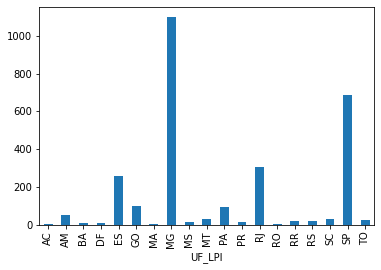

In [39]:
df.groupby('UF_LPI').size().plot(kind='bar')

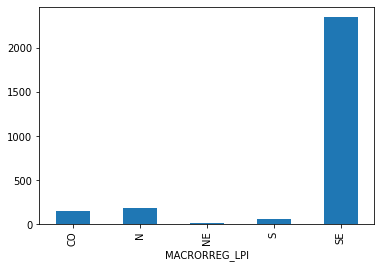

In [42]:
df.groupby('MACRORREG_LPI').size().plot(kind='bar')

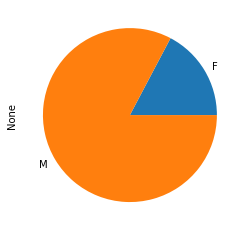

In [43]:
df.groupby('SEXO').size().plot(kind='pie')

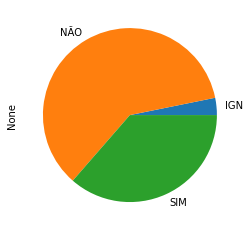

In [44]:
df.groupby('OBITO').size().plot(kind='pie')